<a href="https://colab.research.google.com/github/thainazanfolin/min_sleep_efficiency/blob/main/Projeto_Min_Sleep_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Projeto de Análise de dados: como os fatores de Estilo de Vida influenciam a Eficiência do Sono**

## Analistas
Luiz Fernando Avanelino, Thainá Zanfolin e Vitor Villa Nova<br>
FATEC Araras - Aula de Mineração de Dados

## Dataset no Kaggle

- [Link do dataset no Kaggle](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data)

## **Objetivo do projeto**
Realizar uma análise sobre como diferentes hábitos podem ou não afetar a eficiência do sono, considerando tempo de sono e também sua qualidade.

## **Sobre o Conjunto de Dado**s
O conjunto de dados contém informações sobre um grupo de sujeitos de teste e seus padrões de sono.
- **Subject ID**: Identificação exclusiva de cada sujeito, com idade e gênero registrados.
- **Bedtime**: Hora em que cada sujeito vai para a cama.
- **Wakeup time**: Hora em que cada sujeito acorda.
- **Sleep duration**: Total de tempo dormido em horas.
- **Sleep efficiency**: Proporção do tempo na cama que foi realmente gasto dormindo.
- **REM sleep percentage**: Tempo gasto em sono REM.
- **Deep sleep percentage**: Tempo gasto em sono profundo.
- **Light sleep percentage**: Tempo gasto em sono leve.
- **Awakenings**: Número de vezes que cada sujeito acorda durante a noite.
- **Caffeine consumption**: Consumo de cafeína nas 24 horas anteriores à hora de dormir. (mg)
- **Alcohol consumption**: Consumo de álcool nas 24 horas anteriores à hora de dormir. (oz)
- **Smoking status**: Estado de fumante de cada sujeito.
- **Exercise frequency**: Frequência de exercícios de cada sujeito. (horas)

## **O que esperar deste Colab**:
* Análise exploratória dos dados: entender o dataset, quais são suas variáveis e como trabalhar com elas.
* Limpeza dos dados: padronizações, exclusão de registros nulos ou duplicados, preenchimento de nulos.
* Resumo estatístico: análise de alguns pontos principais do dataset, como valores totais e relações entre algumas das variáveis.

Para alguns trechos de código (principalmente os de plotagem de dados), utilizamos auxílio de ferramentas de IA.

## **Vamos importar a nossa base de dados**
 Optamos por trazer por URL para facilitar o trabalho de todos os membros da equipe em um só colab. <br> Porém, também pode ser feito subindo a base aqui no Colab, normalmente. <br><br>
Vamos começar!

In [125]:
#importando as bibliotecas necessárias
import pandas as pd
import time
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import plotly.graph_objects as go




In [126]:
# trazendo o database de uma url externa

url = 'https://raw.githubusercontent.com/thainazanfolin/min_sleep_efficiency/refs/heads/main/Sleep_Efficiency_table.csv'
df = pd.read_csv(url, delimiter=';')

# Verifique as primeiras linhas do DataFrame
print(df.head(10))


   ID  Age  Gender           Bedtime       Wakeup time  Sleep duration  \
0   1   65  Female  06/03/2021 01:00  06/03/2021 07:00             6.0   
1   2   69    Male  05/12/2021 02:00  05/12/2021 09:00             7.0   
2   3   40  Female  25/05/2021 21:30  25/05/2021 05:30             8.0   
3   4   40  Female  03/11/2021 02:30  03/11/2021 08:30             6.0   
4   5   57    Male  13/03/2021 01:00  13/03/2021 09:00             8.0   
5   6   36  Female  01/07/2021 21:00  01/07/2021 04:30             7.5   
6   7   27  Female  21/07/2021 21:00  21/07/2021 03:00             6.0   
7   8   53    Male  16/08/2021 00:30  16/08/2021 10:30            10.0   
8   9   41  Female  05/04/2021 02:30  05/04/2021 08:30             6.0   
9  10   11  Female  16/09/2021 01:00  16/09/2021 10:00             9.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19        

## **Análise Exploratória dos Dados**

In [127]:
# Observando as informações gerais sobre o dataset, incluindo tipos de dados e valores nulos
df.info()

print('-------')

# Verificar se há linhas duplicadas
linhas_duplicadas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {linhas_duplicadas}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

A partir das informações da tabela conseguimos verificar que:

* existem **452 registros** totais
* nas colunas 'Awakenings', 'Caffeine consumption', 'Alcohol consumption' e 'Exercise frequency' **existem dados faltantes (nulos)**
* não existem linhas duplicadas   

**Vamos trazer mais dados sobre os valores nulos para decidir como vamos fazer a limpeza dos dados.**

In [128]:
#vamos ver quantos nulos temos em cada coluna

null_awakenings = df['Awakenings'].isnull().sum()
print(f"Número de nulos em Awakenings: {null_awakenings}")

null_caffeine = df['Caffeine consumption'].isnull().sum()
print(f"Número de nulos em Caffeine consumption: {null_caffeine}")

null_alcohol = df['Alcohol consumption'].isnull().sum()
print(f"Número de nulos em Alcohol consumption: {null_alcohol}")

null_exercise = df['Exercise frequency'].isnull().sum()
print(f"Número de nulos em Exercise frequency: {null_exercise}")


# Total de nulos no dataframe
sum_null = sum([null_awakenings, null_caffeine, null_alcohol, null_exercise])
print(f"Total de nulos no dataframe: {sum_null}")


Número de nulos em Awakenings: 20
Número de nulos em Caffeine consumption: 25
Número de nulos em Alcohol consumption: 14
Número de nulos em Exercise frequency: 6
Total de nulos no dataframe: 65


**Como vimos, temos o total de 65 valores em branco no dataframe.**<br><br>
**Nossas opções para limpar esses dados são:**

1. excluir as linhas com dados faltantes
2. preencher os dados faltantes com a média dos outros valores (verificar se faz sentido)
3. preencher os dados faltantes com o dado presente em outro caso semelhante (podemos fazer um order by por idade e genero, por exemplo, e trazer o mesmo dado).

Considerando que nossa database tem poucos registros, vamos fazer a opção 1 e 2, para não perder registros. Porém, vamos verificar o dado faltante de acordo com a coluna. <br><br>

Vamos retomar as informações da database, considerando o que nossas colunas trazem:
* Awakenings: Número de vezes que cada sujeito acorda durante a noite
<br>**(é possível fazer uma média entre todos e preencher)** <br><br>

* Caffeine consumption: Consumo de cafeína nas 24 horas anteriores à hora de dormir.
<br>**(é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes, pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)** <br><br>

* Alcohol consumption: Consumo de álcool nas 24 horas anteriores à hora de dormir. <br>**(é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes, pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)**<br><br>

* Exercise frequency: Frequência de exercícios de cada sujeito.
<br>**(é possível fazer uma média entre todos e preencher)**
<br> **(vale observar que a única coluna com um volume baixo de linhas faltantes é o 'Exercise frequency'. valeria apagar apenas os registros com essa coluna nula?)** <br>




## **Começando a Limpeza de Dados**

### **Coluna Awakening**
É possível fazer uma média entre todos e preencher os nulos faltantes

In [129]:
# BLOCO Awakenings: é possível fazer uma média entre todos e preencher

aw_size_original = df['Awakenings'].count()
print(f'Tamanho original da coluna Awakenings: {aw_size_original}')
print('--------')

#Calculando a média de vezes que as pessoas acordam durante a noite
awakenings_total = df['Awakenings'].sum()
media_aw = awakenings_total / df['Awakenings'].size
media_aw = math.ceil(media_aw) # arredondando

print(f'Média de vezes que as pessoas despertaram: {media_aw}')
print('--------')

# A MÉDIA DE VEZES QUE AS PESSOAS ACORDAM DURANTE A NOITE É DE 2x

# Preencher os valores nulos com a média
df['Awakenings'] = df['Awakenings'].fillna(media_aw)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Awakenings'].count()} ")

print('--------')




Tamanho original da coluna Awakenings: 432
--------
Média de vezes que as pessoas despertaram: 2
--------
Total de registros com os nulos preenchidos: 452 
--------


### **Coluna Caffeine Consumption <br>**
É possível fazer uma média entre todos e preencher.

Porém, é importante verificar antes a quantidade de ZEROS presentes,pois a média pode não representar a realidade. Interessante saber se a maioria é 0, se sim, podemos preencher com zeros

Somar a quantidade de zeros nessa coluna para avaliar


In [130]:
# BLOCO Caffeine consumption: é possível fazer uma média entre todos e preencher.

# Porém é importante verificar antes a quantidade de ZEROS presentes,
# pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros

# Somar a quantidade de zeros nessa coluna para avaliar

cf_size_original = df['Caffeine consumption'].count()
print(f'Tamanho original da coluna Caffeine consumption: {cf_size_original}')
print('--------')

zeros_cafe = (df['Caffeine consumption'] == 0).sum()

# Usando a média ponderada como explicado abaixo
media_ponderada = (df['Caffeine consumption'] * df['Caffeine consumption']).sum() / df['Caffeine consumption'].sum()

print(f"Quantidade de zeros na coluna Caffeine consumption: {zeros_cafe}")
print('--------')
print("Como vemos, cerca de metade está zerada, ou seja, pessoas que não consumiram cafeína nas últimas 24 horas. Por isso, resolvemos fazer uma média ponderada")
print('--------')

print(f"Média ponderada da coluna Caffeine consumption: {media_ponderada.round(2)}")
print('--------')

df['Caffeine consumption'] = df['Caffeine consumption'].fillna(media_ponderada)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Caffeine consumption'].count()} ")
print('--------')


Tamanho original da coluna Caffeine consumption: 427
--------
Quantidade de zeros na coluna Caffeine consumption: 211
--------
Como vemos, cerca de metade está zerada, ou seja, pessoas que não consumiram cafeína nas últimas 24 horas. Por isso, resolvemos fazer uma média ponderada
--------
Média ponderada da coluna Caffeine consumption: 62.13
--------
Total de registros com os nulos preenchidos: 452 
--------


**Escolhemos utilizar a média ponderada para preencher os nulos dessa coluna.**
Média Ponderada (ou filtrada) é uma alternativa interessante para calcular a média excluindo os zeros, pois isso representaria melhor o consumo para quem de fato ingere cafeína. Esse método evita que o excesso de zeros distorça o valor médio, mantendo uma aproximação mais realista para os valores nulos.

### **Coluna Alcohol Consumption**
É possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes, pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros


In [131]:
# BLOCO Alcohol consumption: é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes,
# pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)

# todo

cf_size_original = df['Alcohol consumption'].count()
print(f'Tamanho original da coluna Alcohol consumption: {cf_size_original}')
print('--------')

zeros_alcool = (df['Alcohol consumption'] == 0).sum()

# Usando a média ponderada como explicado abaixo
media_ponderada = (df['Alcohol consumption'] * df['Alcohol consumption']).sum() / df['Alcohol consumption'].sum()

print(f"Quantidade de zeros na coluna Alcohol consumption: {zeros_alcool}")
print('--------')

print(f"Média ponderada da coluna Alcohol consumption: {media_ponderada.round(2)}")
print('--------')

df['Alcohol consumption'] = df['Alcohol consumption'].fillna(media_ponderada)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Alcohol consumption'].count()} ")
print('--------')


# todo: somar a quantidade de zeros nessa coluna para avaliar


Tamanho original da coluna Alcohol consumption: 438
--------
Quantidade de zeros na coluna Alcohol consumption: 246
--------
Média ponderada da coluna Alcohol consumption: 3.41
--------
Total de registros com os nulos preenchidos: 452 
--------


**Também optamos pela média ponderada**, já que metade dos registros estavam com zero consumo de álcool.

### **Coluna Exercise frequency**
É possível fazer uma média entre todos e preencher

In [132]:
# BLOCO Exercise frequency: (é possível fazer uma média entre todos e preencher)

ex_size_original = df['Exercise frequency'].count()
print(f'Tamanho original da coluna Exercise frequency: {ex_size_original}')
print('--------')

#Calculando a média de vezes que as pessoas acordam durante a noite
exercise_frequency_total = df['Exercise frequency'].sum()
media_ex = exercise_frequency_total / df['Exercise frequency'].size
media_ex = math.ceil(media_ex)

print(f'Média de vezes que as pessoas se exercitaram na semana: {media_ex}')
print('--------')

# Preencher os valores nulos com a média
df['Exercise frequency'] = df['Exercise frequency'].fillna(media_ex)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Exercise frequency'].count()} ")

print('--------')



Tamanho original da coluna Exercise frequency: 446
--------
Média de vezes que as pessoas se exercitaram na semana: 2
--------
Total de registros com os nulos preenchidos: 452 
--------


### **Vamos verificar se os nulos foram preenchidos!**

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      452 non-null    fl

Para o tratamento dos valores nulos, adotamos técnicas de preenchimento baseadas principalmente nas médias das respectivas colunas. <br><br>Essa escolha foi fundamentada na observação de que o dataset apresenta um equilíbrio em algumas variáveis, como a divisão de gênero e os registros de tempo de sono e eficiência. Assim, o uso das médias se mostrou uma abordagem adequada e eficaz para preencher os dados ausentes, mantendo a integridade e a representatividade do conjunto de dados.

## **Resumo estatístico do Dataframe**
Com a limpeza dos dados feita, vamos fazer uma análise geral do dataframe, focando em um resumo estatístico. O que pensamos em trazer:
Quantidade por gênero <br>

*  Quantidade de registros por gênero
* Distribuição do tempo de sono
* Média de tempo de sono
*  Média de sono REM
* Eficiência do sono x Atividade Física
* Consumo de cafeína x Eficiencia do sono <br>
* Eficiencia do sono x Tempo de sono

### Vamos começar com um resumo geral do Dataframe

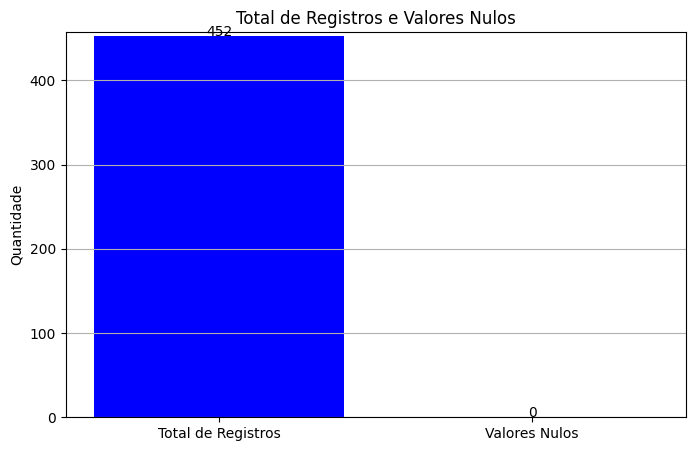

In [134]:
# Calcular as quantidades
num_registros = df.shape[0]            # Total de registros
num_colunas = df.shape[1]              # Número de colunas
num_nulos = df.isnull().sum().sum()    # Total de valores nulos

# Gráfico 1 e 3 Juntos: Total de Registros e Valores Nulos
plt.figure(figsize=(8, 5))
plt.bar(['Total de Registros', 'Valores Nulos'], [num_registros, num_nulos], color=['blue', 'red'])
plt.title('Total de Registros e Valores Nulos')
plt.ylabel('Quantidade')
plt.ylim(0, max(num_registros, num_nulos) + 5)  # Ajustar o limite do eixo y
plt.grid(axis='y')

# Mostrar o valor acima das barras
for i, v in enumerate([num_registros, num_nulos]):
    plt.text(i, v + 0.2, str(v), ha='center')

# Exibir o gráfico
plt.show()

# Gráfico 2: Número de Colunas
from IPython.display import display, HTML # importando

num_colunas = df.shape[1]  # Número de colunas

# Exibir o número de colunas com formatação HTML
display(HTML(f"<h2 style='color: orange;'>Número de Colunas: <strong>{num_colunas}</strong></h2>"))


### Quantidade de registros por Gênero (Male e Female)

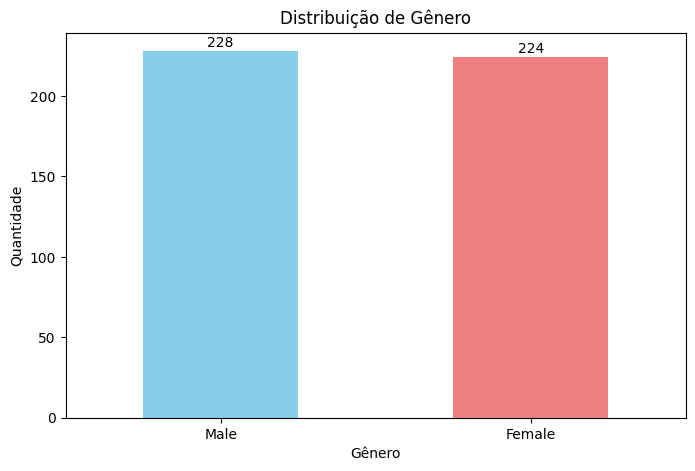

In [135]:
#Quantidade por gênero

# Contagem de homens e mulheres
contagem_genero = df['Gender'].value_counts()

# Gráfico de barras com contagem dentro das barras
ax = contagem_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(8, 5))
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

# Adiciona os rótulos de contagem dentro de cada barra
for i, count in enumerate(contagem_genero):
    ax.text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()




Possível ver que existe um equilíbrio, sendo praticamente metade dos regsitros de cada gênero

### Distribuição por tempo de sono

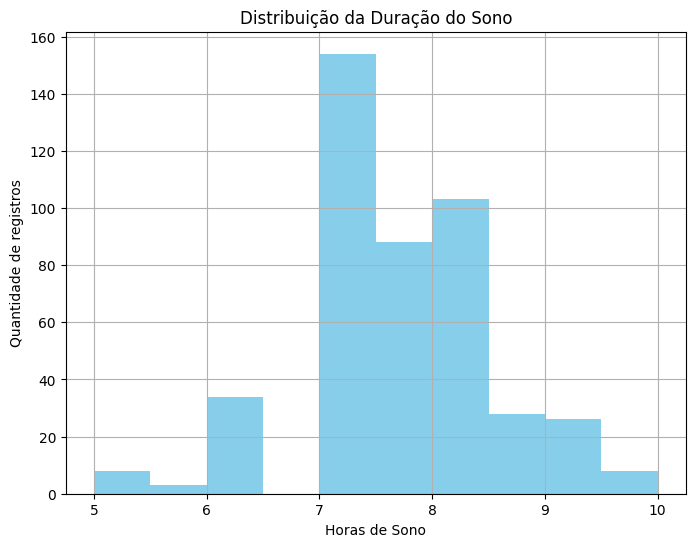

In [136]:
df.describe()

unique_counts = df.nunique()

# Exemplo para uma coluna categórica como 'Gender'
gender_distribution = df['Gender'].value_counts()

df['Sleep duration'].hist(bins=10, figsize=(8,6), color='skyblue')
plt.title('Distribuição da Duração do Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Quantidade de registros')
plt.show()




A partir deste gráfico conseguimos ver que a maioria das pessoas analisadas dormem entre 7h e 8h30 por noite

### Média de tempo de sono entre todos os registros

In [137]:
# Média de tempo de sono

# Para definir o range, vamos ver qual foi o maior registro feito!
maximo_tempo_sono = df['Sleep duration'].max()

# Média do tempo de sono
media_tempo_sono = df['Sleep duration'].mean()


# Gráfico de medido usando Plotly
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=media_tempo_sono,
    title={'text': "Média do Tempo de Sono (Horas)"},
    gauge={'axis': {'range': [0, maximo_tempo_sono]},  # Ajuste o range conforme necessário
           'bar': {'color': "skyblue"}}
))

fig.show()

### **Relações entre as variáveis**
Vamos analisar como algumas variáveis podem influenciar a eficiência do sono.
* **Eficiência de Sono e Atividade física**
* **Eficiencia do sono e Consumo de cafeína (ml nas últimas 24h)**
* **Eficiência do sono e tempo de sono**

Inicialmente fizemos a plotagem com Scatterplot para mostrar a dispersão, mas achamos que os dados ficaram mais complexos de serem entedidos. <br> Por isso, optamos para **mudar para o boxplot e colocá-los em uma só plotagem, para facilitar o entedimento de maneira geral.**

<ipython-input-138-006d74392572>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-138-006d74392572>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-138-006d74392572>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




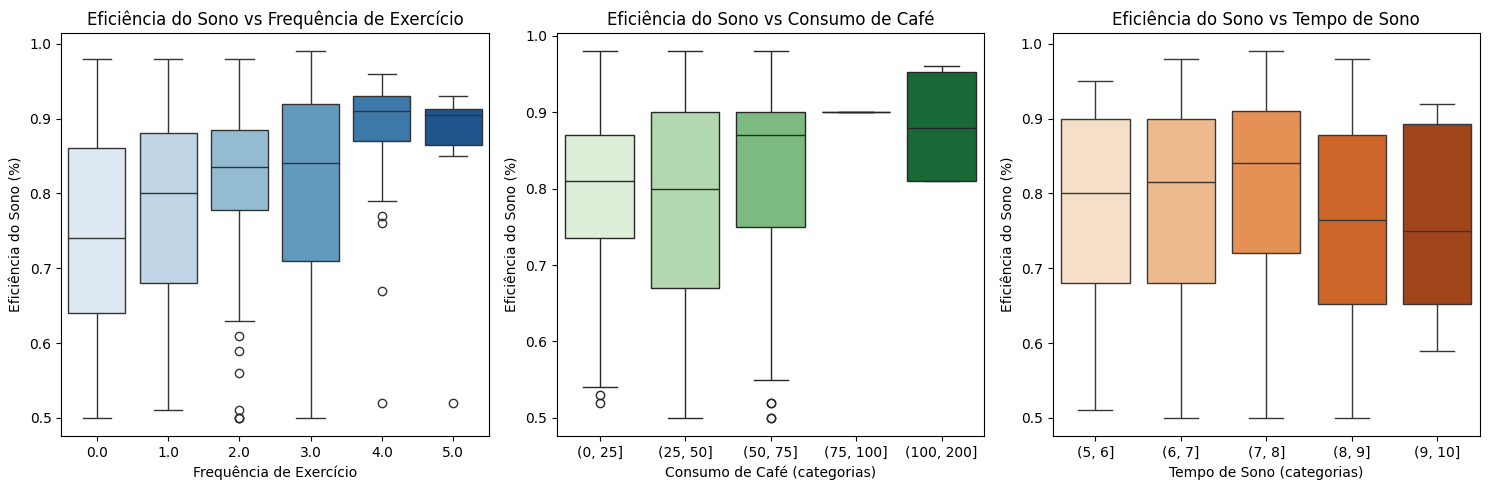

In [138]:
# configurações gerais
plt.figure(figsize=(15, 5))

# Boxplot para Eficiência do Sono e Frequência de Exercício
plt.subplot(1, 3, 1)
sns.boxplot(x='Exercise frequency', y='Sleep efficiency', data=df, palette="Blues")
plt.title("Eficiência do Sono vs Frequência de Exercício")
plt.xlabel("Frequência de Exercício")
plt.ylabel("Eficiência do Sono (%)")

# Boxplot para Eficiência do Sono e Consumo de Café
plt.subplot(1, 3, 2)
sns.boxplot(x=pd.cut(df['Caffeine consumption'], bins=[0, 25, 50, 75, 100, 200]),
            y='Sleep efficiency', data=df, palette="Greens")
plt.title("Eficiência do Sono vs Consumo de Café")
plt.xlabel("Consumo de Café (categorias)")
plt.ylabel("Eficiência do Sono (%)")

# Boxplot para Eficiência do Sono e Tempo de Sono
plt.subplot(1, 3, 3)
sns.boxplot(x=pd.cut(df['Sleep duration'], bins=[5, 6, 7, 8, 9, 10]),
            y='Sleep efficiency', data=df, palette="Oranges")
plt.title("Eficiência do Sono vs Tempo de Sono")
plt.xlabel("Tempo de Sono (categorias)")
plt.ylabel("Eficiência do Sono (%)")

plt.tight_layout()
plt.show()

### **Eficiência do Sono vs. Frequência de Exercício**

* Quanto mais a pessoa se exercita, em geral, melhor é a qualidade do sono. A eficiência do sono tende a **aumentar levemente** com a frequência de exercício.<br>
* As pessoas que se exercitam 4 a 5 vezes por semana têm uma eficiência do sono maior, embora também haja uma variabilidade considerável.
<br>
* Parece haver uma tendência de que, quanto mais frequente o exercício, maior a eficiência do sono, mas com alguma dispersão nos dados.

###**Eficiência do Sono e Consumo de cafeína**

* Beber cafeína parece ter um efeito misto: as pessoas que bebem MUITO POUCO café têm uma eficiência de sono melhor.
* Quem bebe café em quantidades mais moderadas (entre 25 e 100 mg) tem uma qualidade de sono um pouco menor.
* Algumas pessoas que bebem muito café (100-200 mg) ainda conseguem ter um sono eficiente

### **Eficiência do Sono e Tempo de Sono**:

* Dormir pouco (entre 5 e 6 horas) tende a ser mais eficiente nessa amostra.
* Quem dorme mais horas (entre 8 e 10) parece ter uma eficiência de sono um pouco menor. Isso indica que, para algumas pessoas, dormir muito tempo pode não ser tão "eficiente".

### **Resumindo...**
* Exercitar-se com frequência ajuda a melhorar o sono
* Beber café pode atrapalhar a qualidade do sono, mas isso varia de pessoa para pessoa
* Dormir demais pode reduzir a eficiência do sono

# Fim